In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df=pd.read_csv('/content/drive/MyDrive/Data/Digi/DIGIKALA_TRAIN_DATASET.csv')
# df1=pd.read_csv('/content/drive/MyDrive/Data/Digi/DIGIKALA_TEST_DATASET.csv')

In [4]:
df=pd.read_csv('DIGIKALA_TRAIN_DATASET.csv')
df1=pd.read_csv('DIGIKALA_TEST_DATASET.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235483 entries, 0 to 235482
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 235483 non-null  int64  
 1   day                        235483 non-null  int64  
 2   product_id                 235483 non-null  int64  
 3   cat_name                   235483 non-null  object 
 4   leaf_cat_id                235483 non-null  int64  
 5   live_rate                  235483 non-null  float64
 6   product_sat_score          227919 non-null  float64
 7   product_sat_count          235483 non-null  float64
 8   amazing_day_rate           5030 non-null    float64
 9   amazing_price_segment      5030 non-null    float64
 10  amazing_discount           5030 non-null    float64
 11  amazing_order_limit        5027 non-null    float64
 12  amazing_proposed_stock     5030 non-null    float64
 13  promotion_day_rate         49

In [6]:
(df == 0).sum(axis=0)

Unnamed: 0                       1
day                              0
product_id                       0
cat_name                         0
leaf_cat_id                      0
live_rate                        0
product_sat_score                0
product_sat_count             7564
amazing_day_rate                 0
amazing_price_segment            0
amazing_discount                 0
amazing_order_limit              0
amazing_proposed_stock           0
promotion_day_rate            3470
promotion_price_segment       3470
promotion_discount            3470
promotion_order_limit         3470
promotion_proposed_stock      3612
comments_counts_7                0
rec_comments_count_7         10557
dkp_amazing_notif_count_7        0
normal_order_limit             234
normal_price_segment             0
normal_discount              68209
holiday                          0
warehouse1_share             50174
warehouse2_share             22605
amazing_sold_count               0
promotion_sold_count

# Preproccessing

In [7]:
df_train=df.drop(['Unnamed: 0'], axis=1)
# df_test=df1.drop(['Unnamed: 0'], axis=1)

In [8]:
lis=df_train.columns
df_train[lis[7:]] = df_train[lis[7:]].fillna(0)
# df_train

In [9]:
df_train['product_sat_count'] = df_train['product_sat_count'].replace({ 0:np.nan})

In [10]:
df_train.fillna(df_train.mean(),inplace=True)       #Change this part to better

In [11]:
train_sorted = df_train.sort_values(by=["product_id","day"], ascending=True)    #Bara test ham bokon
# train_sorted

In [12]:
y = pd.get_dummies(train_sorted.cat_name, prefix='Cat')
listt={'Cat_CB','Cat_CH',	'Cat_CP',	'Cat_FD',	'Cat_FF'}

In [13]:
train_sorted.drop(['cat_name'], axis=1,inplace=True)

In [14]:
cat1_columns = train_sorted.select_dtypes(['int64']).columns
for cat1 in cat1_columns: 
  train_sorted[cat1] = train_sorted[cat1].astype('float64')

In [15]:
count=0
for l in listt:
  # print(l)
  train_sorted.insert(2+count,l,y.values[:,count])
  count+=1

In [16]:
cat2_columns = train_sorted.select_dtypes(['uint8']).columns
for cat2 in cat2_columns: 
  train_sorted[cat2] = train_sorted[cat2].astype('float64')

In [17]:
# train_sorted.info()

# Specify Target

In [18]:
tt=['warehouse1_share','warehouse2_share','amazing_sold_count','promotion_sold_count','normal_sold_count']
target_number=4
target=tt[target_number]  
l_input=10################cahnged

In [19]:
target

'normal_sold_count'

In [20]:
Data_train=train_sorted.values
y_train=train_sorted[target].values
x_train=Data_train[:,:28]

In [21]:
observe1=np.zeros((len(y_train),l_input))

In [22]:
x_train.shape,len(y_train)

((235483, 28), 235483)

In [23]:
def lag_obv(X,y,l_input):
  lis=np.unique(X[:,1])
  counter=0
  flag=1
  ff=0
  gg=0
  obs=np.zeros((len(y),l_input))
  for l in range(len(lis)):
    # ff=0
    while (X[counter,1]==lis[l] and flag==1):
      if(ff>1):
        # print('hi')
        gg=y[counter-1]-y[counter-2]
        obs[counter,:]=np.append(obs[counter-1,:],gg)[1:l_input+1]
      else:
        ff+=1
      #Chek the condition
      if(counter<len(y)-1):
        counter+=1
      else:
        flag=0
    return obs

In [24]:
observe1=lag_obv(x_train,y_train,l_input)

In [25]:
observe1.shape

(235483, 10)

In [26]:
X_train1=np.concatenate((x_train, observe1), axis=1)


In [27]:
X_train1.shape

(235483, 38)

# Test Preparing

In [28]:
# df_test=df1.drop(['Unnamed: 0'], axis=1)
df_test=df1.copy()

In [29]:
lis=df_test.columns
df_test[lis[8:]] = df_test[lis[8:]].fillna(0) ##Changed
##
df_test['product_sat_count'] = df_test['product_sat_count'].replace({ 0:np.nan})

df_test.fillna(df_test.mean(),inplace=True)       #Change this part to better
test_sorted1 = df_test.sort_values(by=["product_id","day"], ascending=True)    #Bara test ham bokon

index_save=test_sorted1['Unnamed: 0'].values   ####For knowing the index

test_sorted=test_sorted1.drop(['Unnamed: 0'], axis=1)

y = pd.get_dummies(test_sorted.cat_name, prefix='Cat')
listt={'Cat_CB','Cat_CH',	'Cat_CP',	'Cat_FD',	'Cat_FF'}
test_sorted=test_sorted.drop(['cat_name'], axis=1)
##

cat1_columns = test_sorted.select_dtypes(['int64']).columns
for cat1 in cat1_columns: 
  test_sorted[cat1] = test_sorted[cat1].astype('float64')
count=0
for l in listt:
  # print(l)
  test_sorted.insert(2+count,l,y.values[:,count])  ##Changed
  count+=1

cat2_columns = test_sorted.select_dtypes(['uint8']).columns
for cat2 in cat2_columns: 
  test_sorted[cat2] = test_sorted[cat2].astype('float64')

##
Data_test=test_sorted.values
y_test=test_sorted[target].values
x_test=Data_test[:,:28]

obs_test=lag_obv(x_test,y_test,l_input)
X_test1=np.concatenate((x_test, obs_test), axis=1)

In [30]:
# test_sorted.info()

In [31]:
X_test1.shape,y_test.shape

((100396, 38), (100396,))

# PCA And model

In [32]:
# split the dataset into train and test for 
from sklearn.model_selection import train_test_split
X_t, X_Val, y_t, y_Val = train_test_split(X_train1, y_train, test_size=0.25, random_state=40)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train2 = pca.fit_transform(X_t)      
X_Val1 = pca.transform(X_Val)       #Changed

In [35]:
X_train_f = X_train2.copy()
X_Val_f = X_Val1.copy()

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scalar=MinMaxScaler()
y_t=scalar.fit_transform(y_t.reshape(-1, 1))
y_Val=scalar.transform(y_Val.reshape(-1, 1))


In [37]:
print(X_train_f.shape,y_t.shape)
print(X_Val_f.shape,y_Val.shape)

(176612, 15) (176612, 1)
(58871, 15) (58871, 1)


In [38]:
y_Val_check=scalar.inverse_transform(y_Val.reshape(-1,1))  ####Changedddd


# Model

In [39]:
#Without gridseach
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
regr = make_pipeline(StandardScaler(),RandomForestRegressor(max_depth=10))
regr.fit(X_train_f, y_t.ravel())


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])

In [40]:
y_pred1=regr.predict(X_Val_f)             #check this line
y_pred=scalar.inverse_transform(y_pred1.reshape(-1,1))

In [41]:
if target_number>1 :
    y_pred=np.round(y_pred)
else:
    y_pred=y_pred

In [42]:
y_pred

array([[7.],
       [0.],
       [3.],
       ...,
       [0.],
       [0.],
       [0.]])

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('MSE for the model is:%0.2f'%mean_squared_error(y_Val_check,y_pred))
print('MAE for the model is:%0.2f'%mean_absolute_error(y_Val_check,y_pred))
print ('R squared metric for the model is:%0.2f'%regr.score(X_Val_f,y_Val))

MSE for the model is:23.22
MAE for the model is:1.03
R squared metric for the model is:0.85


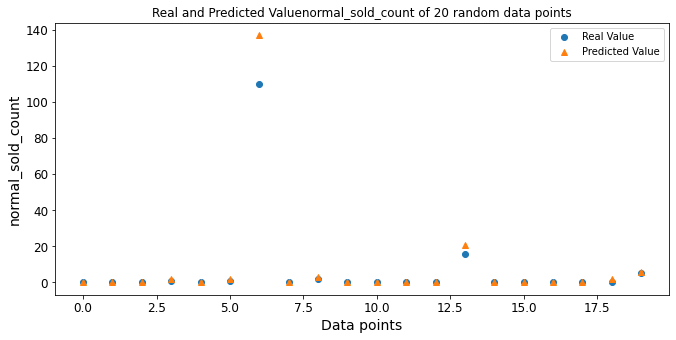

In [44]:
plt.figure(figsize=(11,5))
a_indices=np.random.randint(1,10000,20)   #generate 20 random test numbersto show
plt.plot(y_Val_check[a_indices],'o',label='Real Value')
plt.plot(y_pred[a_indices],'^',label='Predicted Value')
plt.title('Real and Predicted Value'+target+' of 20 random data points')
plt.ylabel(target)
plt.xlabel('Data points')
plt.legend()

# Feature Importance

In [45]:
# # plot the 7 most important features  ???????
# plt.figure(figsize=(10,7))
# feat_importances = pd.Series(regr.feature_importances_, index = train_x.columns)
# feat_importances.nlargest(7).plot(kind='barh');

In [46]:
# v_list=train_sorted.columns
# pp=list(range(30))
# vv=v_list.append(pp)

In [47]:
###Run Above

# Final Test

In [48]:
index_save.shape

(100396,)

In [49]:
counter=0
hh=np.where(y_test==-1)[0]
y_predict=np.zeros(len(hh))
for i in hh:
    
    X_test_f = pca.transform(X_test1[i,:].reshape(1, -1)) 
    y_predict[counter]=regr.predict(X_test_f)
    day_list=np.where(X_test1[:,1]==X_test1[i,1])[0]
    for d in day_list:
        delta=d-i
        if( delta>0 and delta<l_input):
            ind=28+l_input-delta
            X_test1[d,ind]=y_predict[counter]
            
    counter=counter+1      
            

In [50]:
y_predict_f=scalar.inverse_transform(y_predict.reshape(-1,1))

In [51]:
if target_number>1 :
    y_predict_f=np.round(y_predict_f)
else:
    y_predict_f=y_predict_f


In [52]:
y_predict_f

array([[2.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

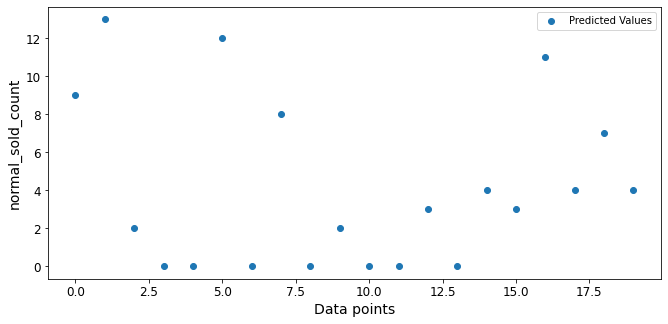

In [65]:
plt.figure(figsize=(11,5))
a_indices=np.random.randint(1,500,20)   #generate 20 random test numbersto show
plt.plot(y_predict_f[a_indices],'o',label='Predicted Values')
plt.ylabel(target)
plt.xlabel('Data points')
plt.legend()

# Saving the Values

In [54]:
# y_final=y_test.copy().reshape(-1,1)
# y_final[hh]=y_predict_f



In [55]:
# data={'index':index_save,'col2':y_final.reshape(len(y_final)) }
# nn= pd.DataFrame(data,columns = ['index','col2'])

In [56]:
# final = nn.sort_values(by=["index"], ascending=True)
# # final

In [57]:
# jj=final.values

In [58]:
# # output=np.zeros((48306,5))
# output[:,target_number]=jj[52090:,1].copy()

In [59]:
# output

In [60]:
# day=df1['day'].values[52090:]
# product_id=df1['product_id'].values[52090:]
# Dataa={'day':day,'product_id': product_id ,tt[0] :output[:,0],tt[1] : output[:,1],tt[2] :output[:,2],tt[3] :output[:,3],tt[4] :output[:,4] }
# df_final= pd.DataFrame(Dataa)
# df_final.to_csv('Reza2_Output.csv',index = False)

In [61]:
# df12['amazing_sold_count']=output[:,2].copy()
# df12['promotion_sold_count']=output[:,3].copy()
# df12.to_csv('RezaTalakoob_Output.csv',index = False)

In [62]:
Final_regression=pd.read_csv('RezaTalakoob_Output.csv')
Final_regression

,day,product_id,warehouse1_share,warehouse2_share,amazing_sold_count,promotion_sold_count,normal_sold_count
0,31,10900769,0.470108,0.499598,0.0,0.0,23.0
1,31,1187493,0.195143,0.777945,0.0,0.0,0.0
2,31,389475,0.001966,0.000538,0.0,0.0,0.0
3,31,6928982,0.000820,0.002639,0.0,0.0,0.0
4,31,4797857,0.007657,0.997510,0.0,0.0,41.0
...,...,...,...,...,...,...,...
48301,60,3947123,0.001292,0.001089,0.0,0.0,0.0
48302,60,1187256,0.000705,0.001026,0.0,0.0,0.0
48303,60,6707891,0.246540,0.741991,0.0,0.0,7.0
48304,60,3990159,0.000751,0.001204,0.0,0.0,0.0
